In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ggpubr))
suppressMessages(library(ggridges))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)
source("../src/disease_class.r")
source("../src/plot_iso_structure.r")

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig07.RData")
load("../data/data_Fig02extra.RData")

[1] "five_utr_genes, MSigDB_Hallmark_2020"
[1] "three_utr_genes, MSigDB_Hallmark_2020"


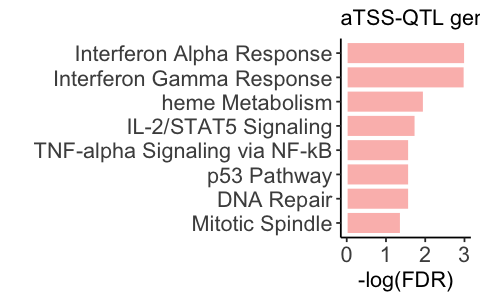

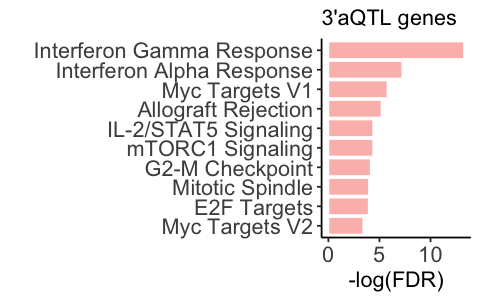

In [4]:
dbs <- c(# "GO_Biological_Process_2018","GO_Cellular_Component_2018","GO_Molecular_Function_2018",
         # "COVID-19_Related_Gene_Sets",
         "MSigDB_Hallmark_2020"
         # "WikiPathways_2019_Human",
         # "ProteomicsDB_2020",
         # "KEGG_2019_Human"
         # "GWAS_Catalog_2019",
         # "ClinVar_2019"
         # "ENCODE_TF_ChIP-seq_2015","TRRUST_Transcription_Factors_2019"
        )

options(repr.plot.width=4, repr.plot.height=2.5)
for (type in c("five_utr_genes",
               "three_utr_genes")){
  for (n in 1:length(dbs)){
    tryCatch({
      print(paste0(type, ", ", dbs[n]))
      pathway <- gsub("-","_",dbs[n])
      res <- read.table(paste0("../data/",type,"_",pathway,".txt"),header = TRUE,sep="\t")
      res$sig <- ifelse(res$Adjusted.P.value<0.05, "red", "grey")
      res = res[res$Adjusted.P.value<0.05,]
    if (type == "five_utr_genes") {
        title_lab = "aTSS-QTL genes"
        } else if (type == "three_utr_genes") {
        title_lab = "3'aQTL genes"
    }
    if (any(res$sig=="red")){
        res$logFDR <- -log10(res$Adjusted.P.value)
        res2 <- head(res[order(res$Adjusted.P.value, decreasing=FALSE),],10)
        res2$Term <- stringr::str_split(res2$Term, pattern = " \\(", simplify = TRUE)[,1]
        plot(ggplot(res2, aes(x=reorder(x = Term, X = logFDR, FUN = sum), y=logFDR,  fill=sig)) +
               geom_bar(stat="identity", color="white", alpha = 0.5, position=position_dodge()) +
               # scale_fill_manual(values = c("red" = "red", "grey" = "grey")) +
               xlab("") +
               ylab("-log(FDR)") +
               theme_classic() +
               coord_flip() +
               ggtitle(title_lab) +
               theme(strip.text.x=element_text(size=13, color="black", face="bold.italic"),
                     legend.position = "none",
                     plot.title = element_text(size=13),
                     axis.title.x = element_text(size=13),
                     axis.title.y = element_text(size =13),
                     axis.text.y = element_text(size = 13),
                     axis.text.x = element_text(size = 13),
                     legend.text =  element_text(size = 13),
                     legend.key.size = grid::unit(0.8, "lines"),
                     legend.title = element_text(size = 0, hjust = 0)) )
        if (type=="five_utr_genes"){
            pdf("./Figure7a.pdf", width=4, height=2.5)
        } else if (type=="three_utr_genes"){
            pdf("./Figure7b.pdf", width=4, height=2.5)
        }
        plot(ggplot(res2, aes(x=reorder(x = Term, X = logFDR, FUN = sum), y=logFDR,  fill=sig)) +
               geom_bar(stat="identity", color="white", alpha = 0.5, position=position_dodge()) +
               # scale_fill_manual(values = c("red" = "red", "grey" = "grey")) +
               xlab("") +
               ylab("-log(FDR)") +
               theme_classic() +
               coord_flip() +
               ggtitle(title_lab) +
               theme(strip.text.x=element_text(size=13, color="black", face="bold.italic"),
                     legend.position = "none",
                     plot.title = element_text(size=13),
                     axis.title.x = element_text(size=13),
                     axis.title.y = element_text(size =13),
                     axis.text.y = element_text(size = 13),
                     axis.text.x = element_text(size = 13),
                     legend.text =  element_text(size = 13),
                     legend.key.size = grid::unit(0.8, "lines"),
                     legend.title = element_text(size = 0, hjust = 0)) )
        dev.off()
      }
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
  }
}


Picking joint bandwidth of 11.2

Picking joint bandwidth of 11.2



pdf 
  2

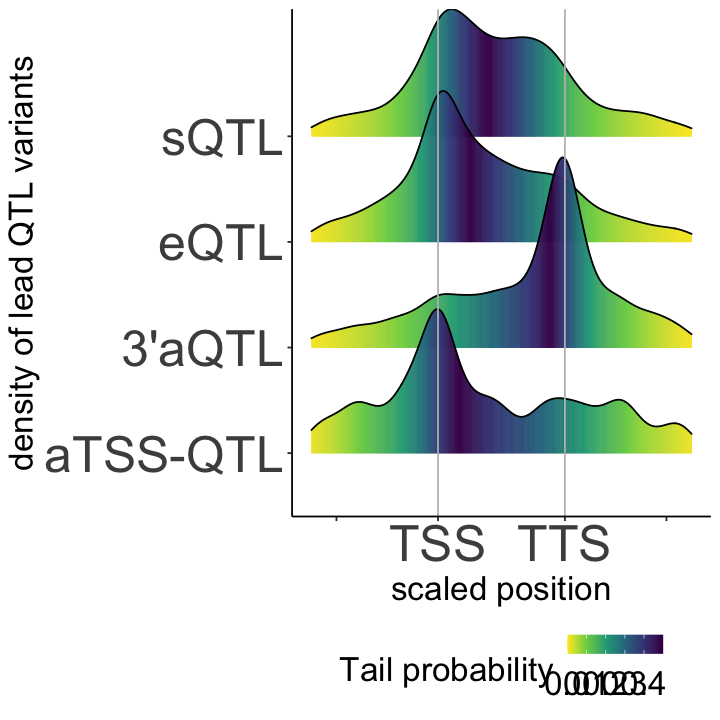

In [5]:
# distribution of lead QTL variants

options(repr.plot.width=6, repr.plot.height=6)
g = dat %>%
  dplyr::filter(rank==1) %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL",
    QTL == "cis" ~ "eQTL",
    QTL == "splicing" ~ "sQTL"
  ),
  QTL = factor(QTL,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL"))) %>%
  ggplot(., aes(x = scaled_pos, y = QTL, fill = 0.5 - abs(0.5 - stat(ecdf)))) + 
  ggridges::stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_viridis_c(name = "Tail probability", direction = -1) +
  scale_x_continuous(labels=c("","TSS","TTS",""), breaks=c(-80,0,100,180), limits=c(-100,200)) +
  geom_vline(xintercept=0,col="grey") +
  geom_vline(xintercept=100,col="grey") +
  scale_color_npg() +
  theme_classic() +
  xlab("scaled position") +
  ylab("density of lead QTL variants") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 30),
        axis.text.x = element_text(size = 30),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))


g
pdf("./Figure7c.pdf", width=6, height=6)
g
dev.off()

Picking joint bandwidth of 21.1

Picking joint bandwidth of 21.1



pdf 
  2

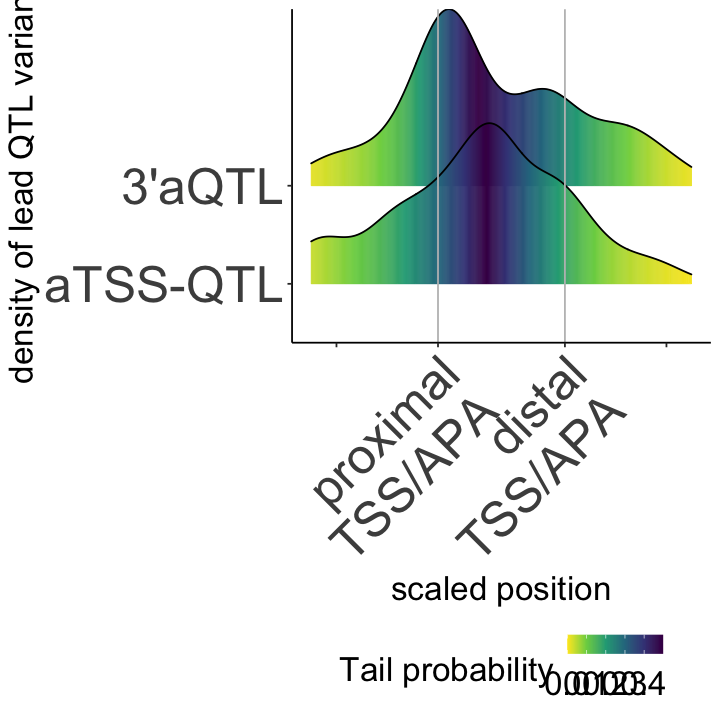

In [6]:
# distribution of lead QTL variants focusing on aTSS-QTL and 3'aQTL

options(repr.plot.width=6, repr.plot.height=6)
g = dat_utr %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL"
  ),
  QTL = factor(QTL,levels=c("aTSS-QTL","3'aQTL"))) %>%
  ggplot(., aes(x = scaled_pos, y = QTL, fill = 0.5 - abs(0.5 - stat(ecdf)))) + 
  ggridges::stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_viridis_c(name = "Tail probability", direction = -1) +
  scale_x_continuous(labels=c("","proximal\nTSS/APA","distal\nTSS/APA",""), breaks=c(-80,0,100,180), limits=c(-100,200)) +
  geom_vline(xintercept=0,col="grey") +
  geom_vline(xintercept=100,col="grey") +
  ggsci::scale_color_npg() +
  theme_classic() +
  xlab("scaled position") +
  ylab("density of lead QTL variants") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 30),
        axis.text.x = element_text(size = 30, angle = 45, hjust = 1),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))

g
pdf("./Figure7d.pdf", width=6, height=6)
g
dev.off()

pdf 
  2

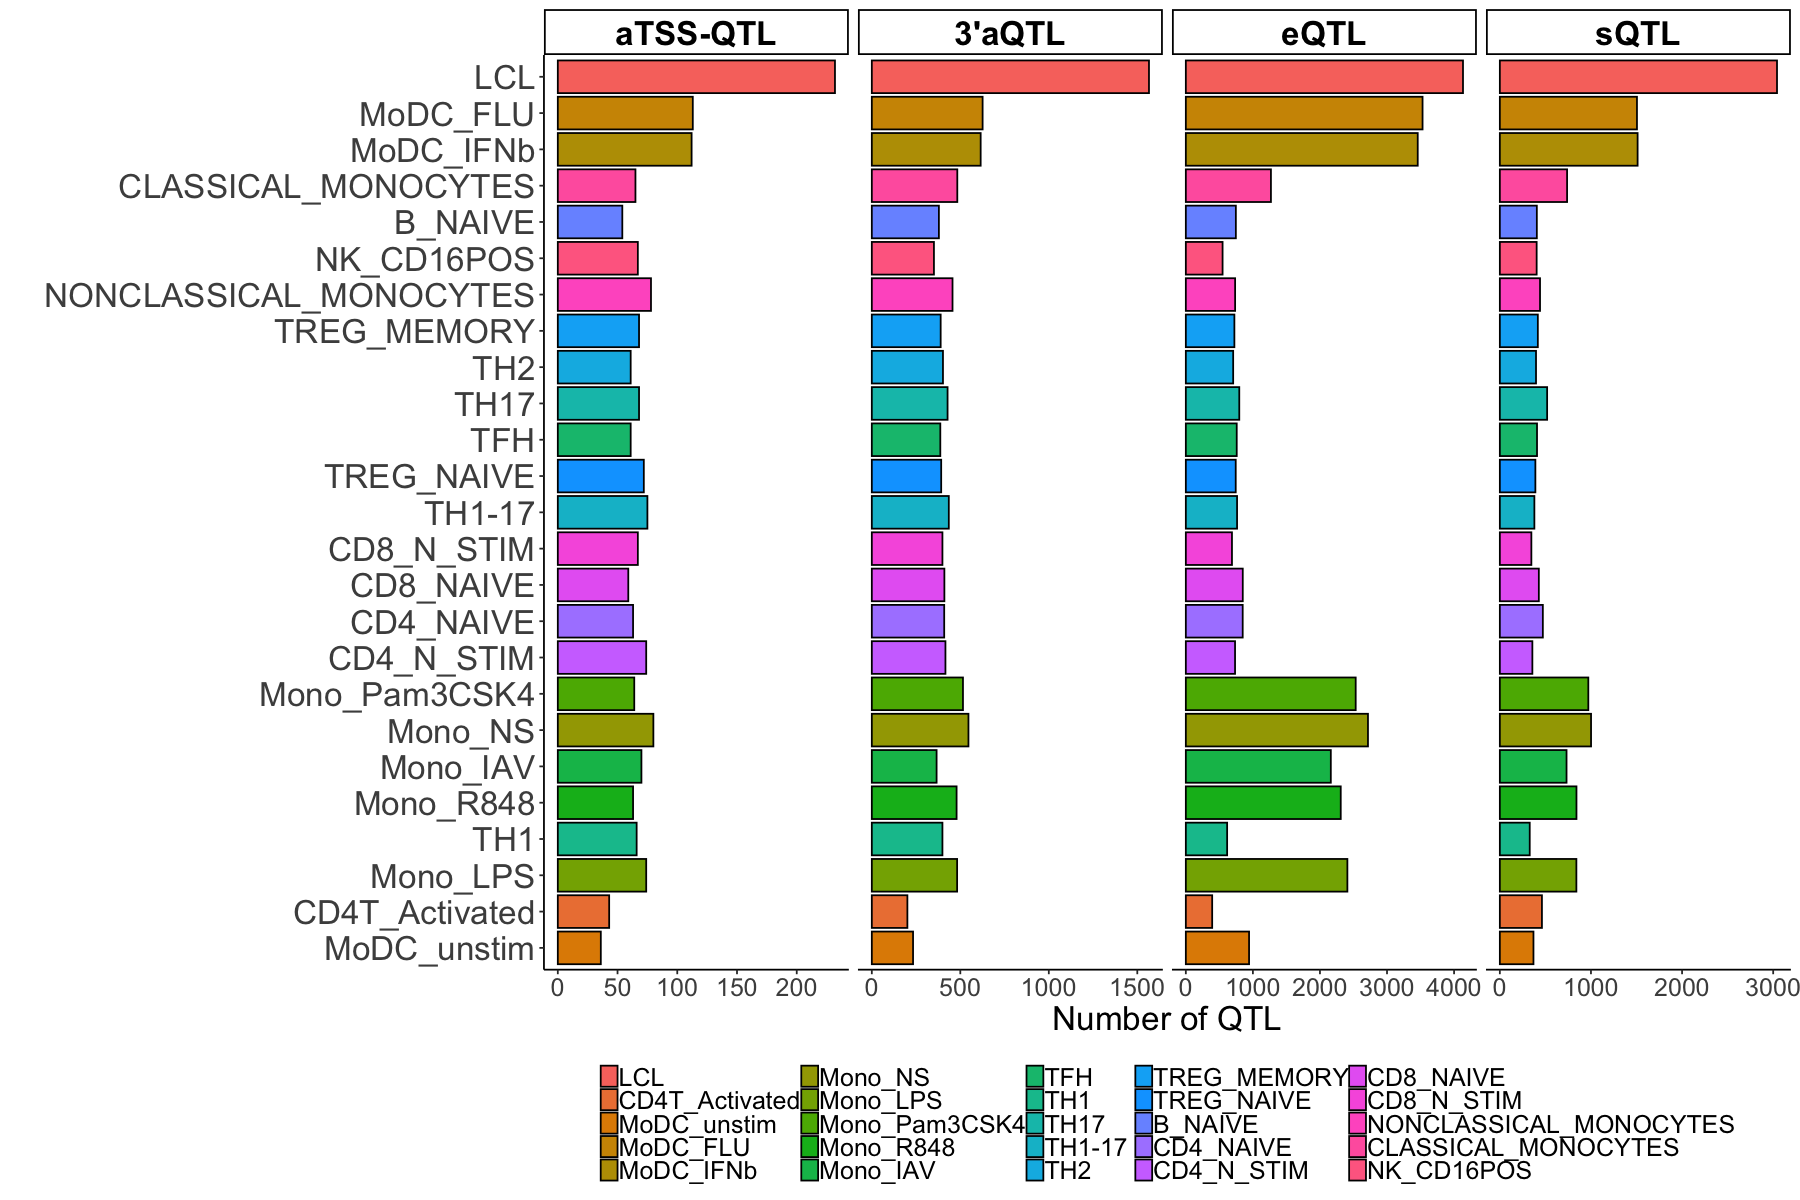

In [7]:
# number of QTL variants(lead variants per eGenes or eIsoforms, p<1e<-05)

options(repr.plot.width=15, repr.plot.height=10)
g = dat %>%
  dplyr::group_by(QTL,condition) %>%
  dplyr::summarize(count = n()) %>%
  dplyr::ungroup() %>%
  as.data.frame() %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL",
    QTL == "cis" ~ "eQTL",
    QTL == "splicing" ~ "sQTL"
  ),
  QTL = factor(QTL,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
  condition = factor(condition,levels=c("LCL",
                                        "CD4T_Activated","MoDC_unstim","MoDC_FLU","MoDC_IFNb",
                                        "Mono_NS","Mono_LPS","Mono_Pam3CSK4","Mono_R848","Mono_IAV",
                                        "TFH","TH1","TH17","TH1-17","TH2","TREG_MEMORY","TREG_NAIVE","B_NAIVE","CD4_NAIVE","CD4_N_STIM","CD8_NAIVE","CD8_N_STIM","NONCLASSICAL_MONOCYTES","CLASSICAL_MONOCYTES","NK_CD16POS"))) %>%
  merge(.,data.frame(
    condition = 
      c("LCL",
        "CD4T_Activated","MoDC_unstim","MoDC_FLU","MoDC_IFNb",
        "Mono_NS","Mono_LPS","Mono_Pam3CSK4","Mono_R848","Mono_IAV",
        "TFH","TH1","TH17","TH1-17","TH2","TREG_MEMORY","TREG_NAIVE","B_NAIVE","CD4_NAIVE","CD4_N_STIM","CD8_NAIVE","CD8_N_STIM","NONCLASSICAL_MONOCYTES","CLASSICAL_MONOCYTES","NK_CD16POS"),
    sample_size = 
      c(373,
        89,55,167,152,
        100,95,100,98,99,
        104,95,104,103,104,104,103,106,101,100,102,102,105,106,105)),
    by="condition") %>%
  ggplot(., aes(x=reorder(condition,sample_size), y=count, fill=condition)) +
  geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_classic() +
  ylab("Number of QTL") +
  xlab("") +
  coord_flip() +
  facet_grid( . ~ QTL , scales = "free") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

g
pdf("./FigS10.pdf", width=15, height=10)
g
dev.off()

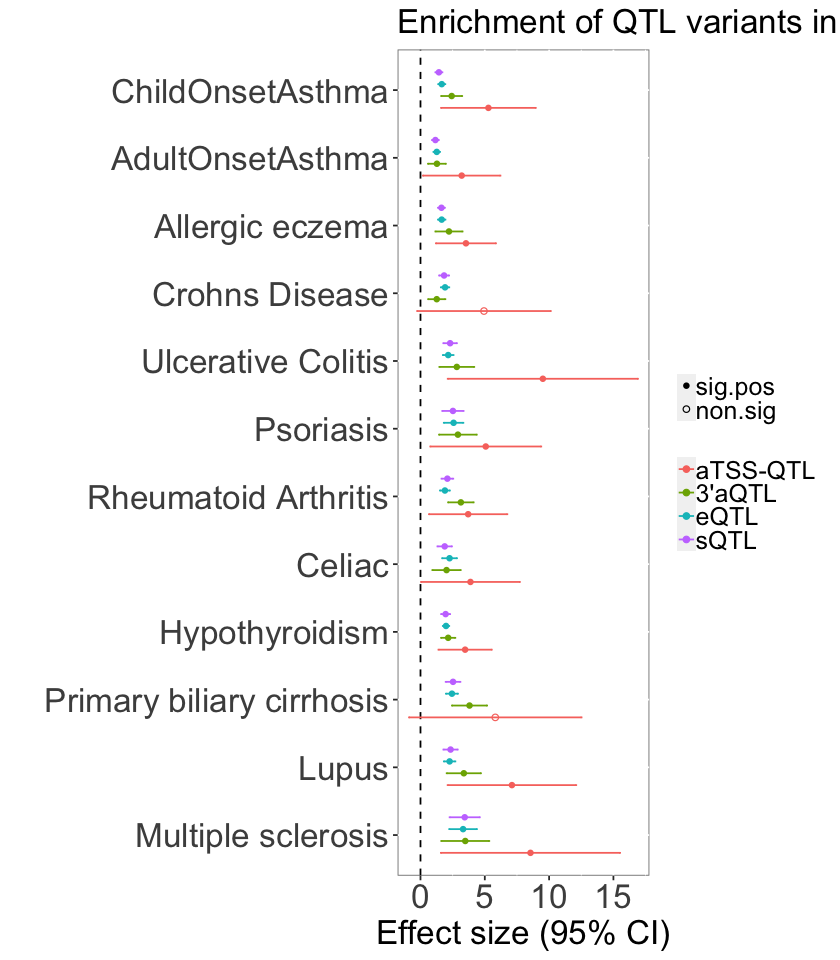

In [8]:
# Enrichment of QTLs
options(repr.plot.width=7, repr.plot.height=8)
## immune disorders
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Enrichment-1.96*Enrichment_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno) %>% gsub("UKB_460K.disease_","",.) %>% gsub("_Ferreira2019","",.)) %>%
  dplyr::filter(group == "immune") %>%
  dplyr::mutate(pheno = dplyr::case_when(
      pheno == "PSORIASIS" ~ "Psoriasis",
      pheno == "HYPOTHYROIDISM_SELF_REP" ~ "Hypothyroidism",
      pheno == "ALLERGY_ECZEMA_DIAGNOSED" ~ "Allergic eczema",
      TRUE ~ gsub("_"," ",pheno)
  ),
               pheno = factor(pheno, levels=c("Multiple sclerosis","Lupus","Primary biliary cirrhosis","Hypothyroidism","Celiac","Rheumatoid Arthritis","Psoriasis","Ulcerative Colitis","Crohns Disease","Allergic eczema","AdultOnsetAsthma","ChildOnsetAsthma"))) %>%
  ggplot(., 
         aes(x=pheno, y=Enrichment, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 0.7),size = 1.5) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Enrichment of QTL variants in GWAS"), 
       y = "Effect size (95% CI)", 
       x = "") +
  geom_errorbar(aes(ymin = Enrichment-1.96*Enrichment_std_error, ymax = Enrichment+1.96*Enrichment_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 0.7)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))


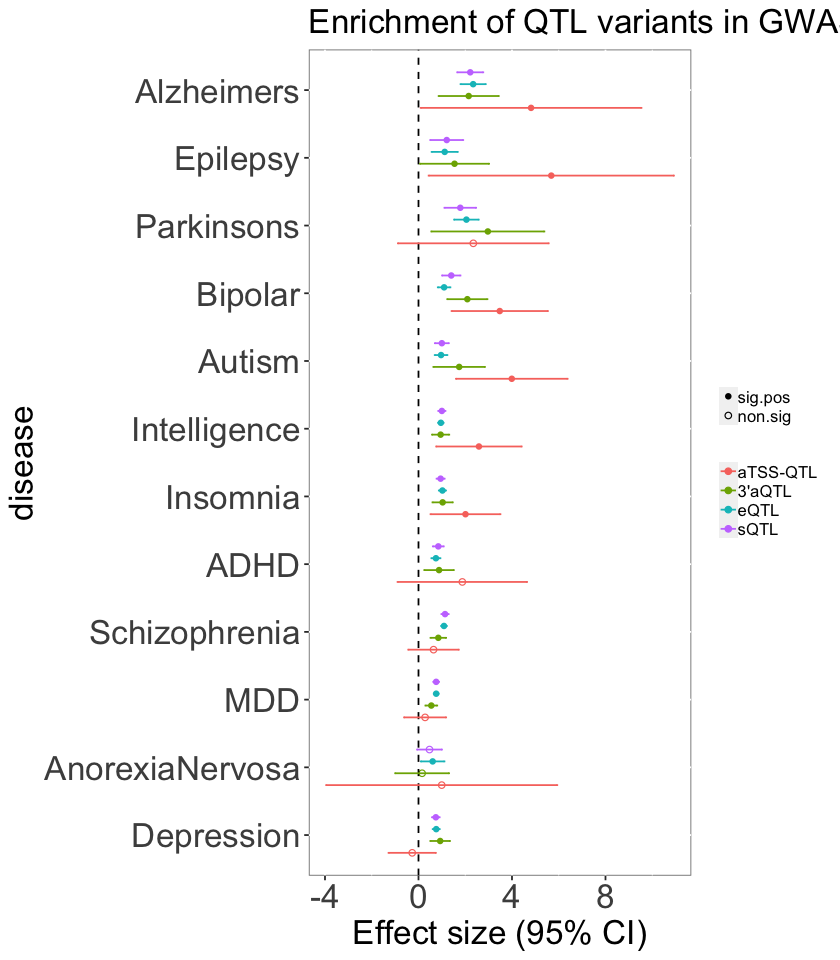

In [9]:
## CNS
options(repr.plot.width=7, repr.plot.height=8)
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Enrichment-1.96*Enrichment_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno) %>% gsub("UKB_460K.disease_","",.) %>% stringr::str_split(.,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(., 
         aes(x=reorder(pheno,Enrichment), y=Enrichment, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 0.7),size = 1.5) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Enrichment of QTL variants in GWAS"), 
       y = "Effect size (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Enrichment-1.96*Enrichment_std_error, ymax = Enrichment+1.96*Enrichment_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 0.7)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))


pdf 
  2

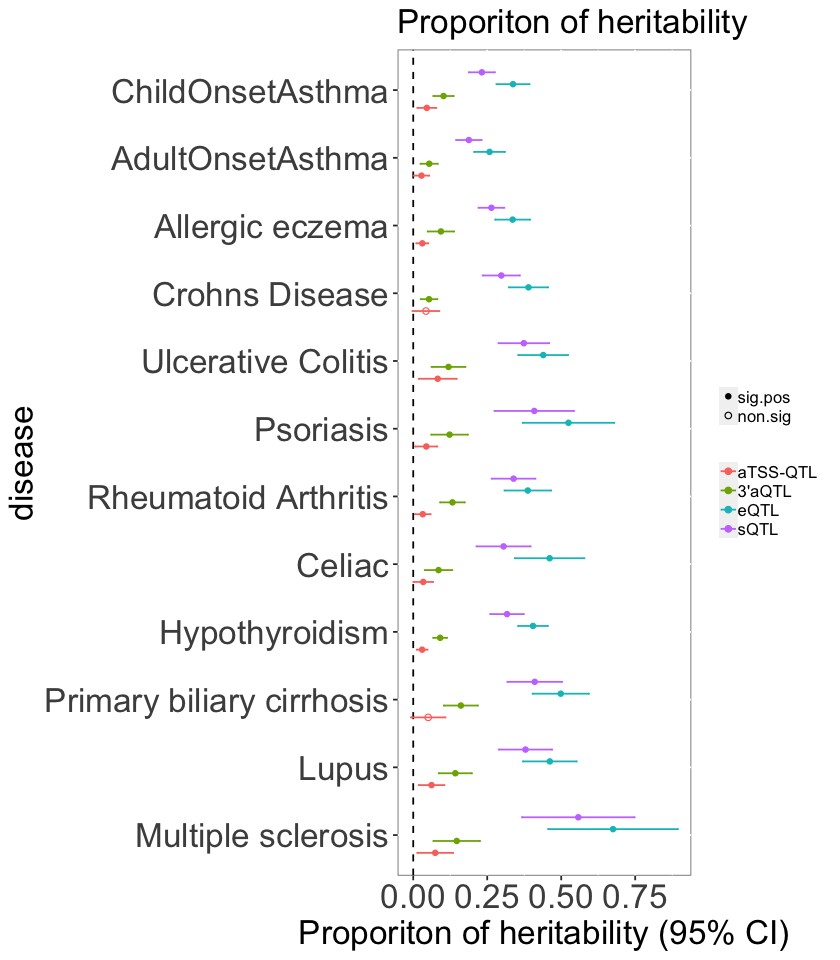

In [10]:
# Proportion of heritability

## immune disorders
options(repr.plot.width=7, repr.plot.height=8)
g = enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Prop._h2-1.96*Prop._h2_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno) %>% gsub("UKB_460K.disease_","",.) %>% gsub("_Ferreira2019","",.)) %>%
  dplyr::filter(group == "immune") %>%
  dplyr::mutate(pheno = dplyr::case_when(
      pheno == "PSORIASIS" ~ "Psoriasis",
      pheno == "HYPOTHYROIDISM_SELF_REP" ~ "Hypothyroidism",
      pheno == "ALLERGY_ECZEMA_DIAGNOSED" ~ "Allergic eczema",
      TRUE ~ gsub("_"," ",pheno)
  ),
               pheno = factor(pheno, levels=c("Multiple sclerosis","Lupus","Primary biliary cirrhosis","Hypothyroidism","Celiac","Rheumatoid Arthritis","Psoriasis","Ulcerative Colitis","Crohns Disease","Allergic eczema","AdultOnsetAsthma","ChildOnsetAsthma"))) %>%
  ggplot(., 
         aes(x=pheno, y=Prop._h2, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 0.7),size = 1.5) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Proporiton of heritability"), 
       y = "Proporiton of heritability (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Prop._h2-1.96*Prop._h2_std_error, ymax = Prop._h2+1.96*Prop._h2_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 0.7)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g
pdf("./Figure7e.pdf", width=7, height=8)
g
dev.off()

pdf 
  2

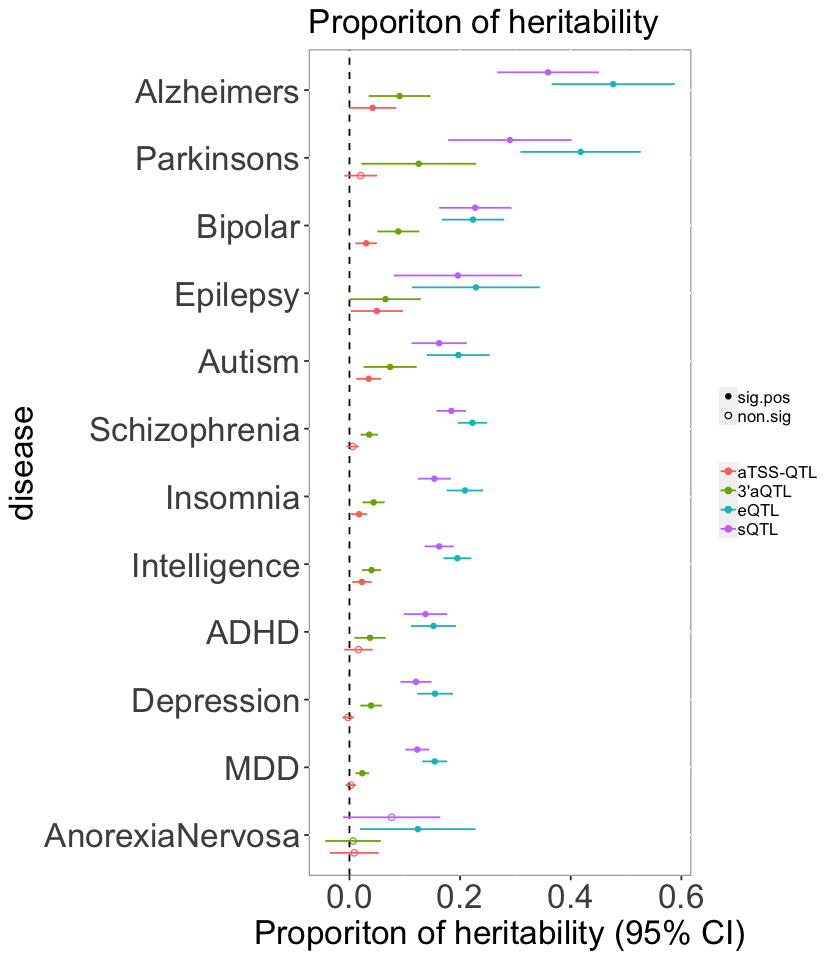

In [11]:
## CNS
options(repr.plot.width=7, repr.plot.height=8)
g = enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Prop._h2-1.96*Prop._h2_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno) %>% gsub("UKB_460K.disease_","",.) %>% stringr::str_split(.,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(., 
         aes(x=reorder(pheno,Prop._h2), y=Prop._h2, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 0.7),size = 1.5) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Proporiton of heritability"), 
       y = "Proporiton of heritability (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Prop._h2-1.96*Prop._h2_std_error, ymax = Prop._h2+1.96*Prop._h2_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 0.7)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g
pdf("./Figure7f.pdf", width=7, height=8)
g
dev.off()

In [12]:
# colocalization

lt = df %>%
  dplyr::filter(GWAS>10 & !grepl("_SELF_REP",disease)) %>% # extract diseases with GWAS loci > 10
  as.data.frame() %>%
  .$disease %>% as.character() %>% unique()
dis_lt = c(immune,CNS,cancer,metabo)[c(immune,CNS,cancer,metabo) %in% lt]


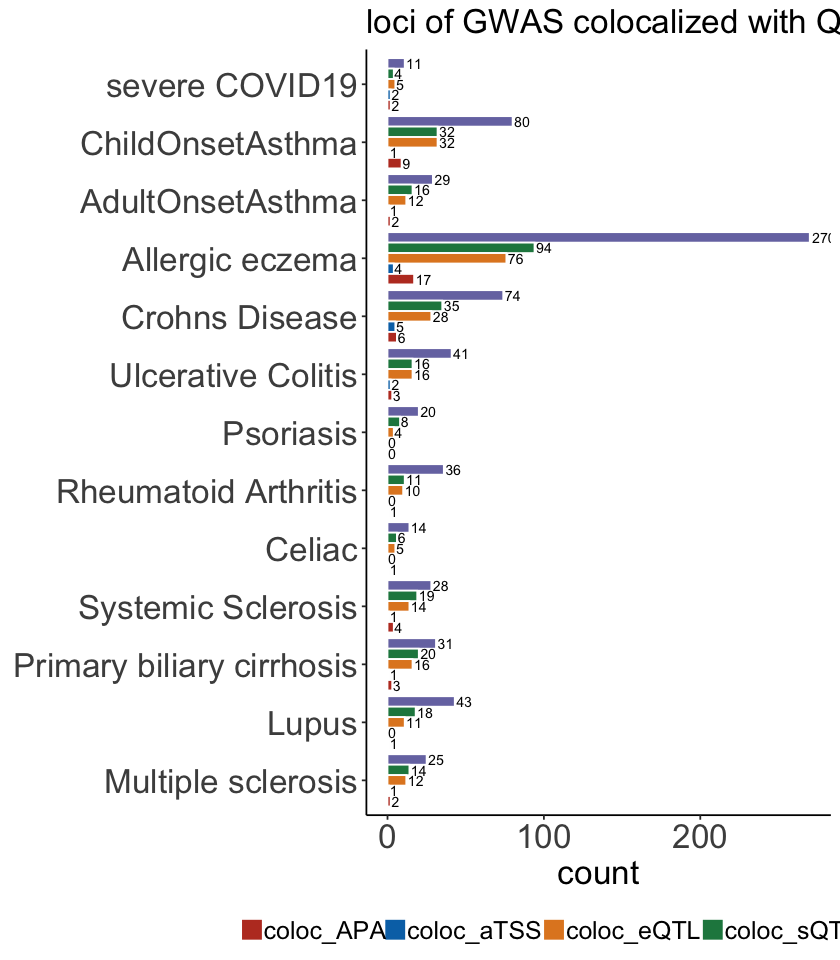

pdf 
  2

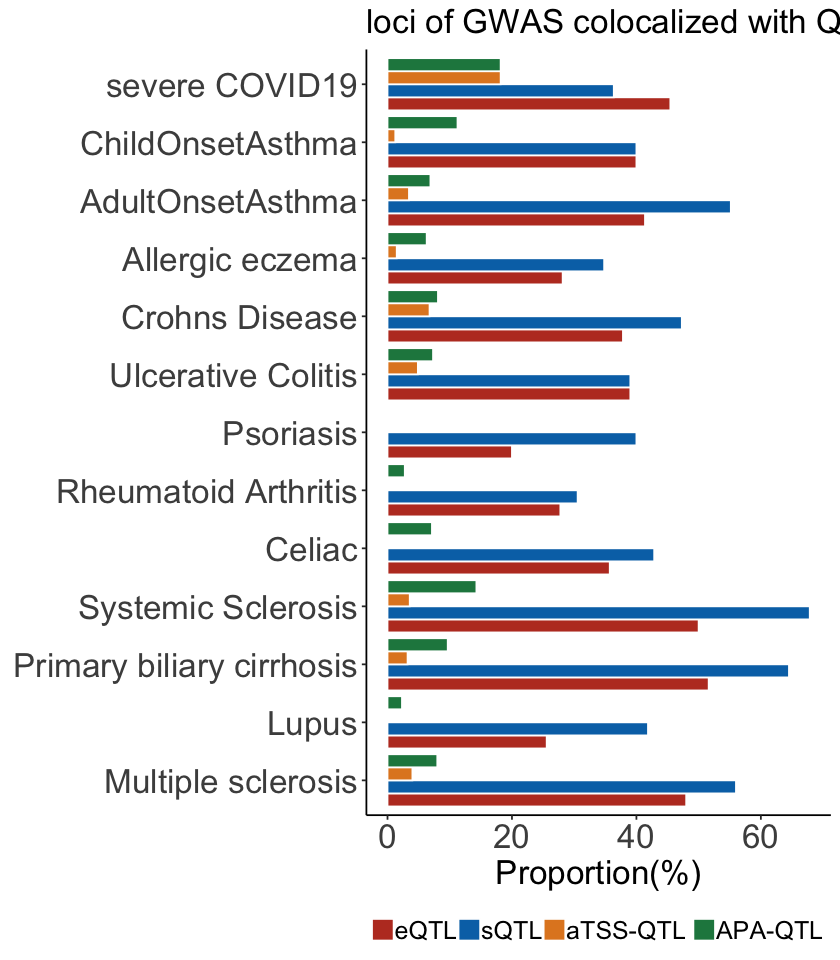

In [13]:
## immune disorders
options(repr.plot.width=7, repr.plot.height=8)
df %>%
  dplyr::filter(GWAS>10 & !grepl("_SELF_REP",disease)) %>%
  dplyr::mutate(eQTL_pro = 100*coloc_eQTL/GWAS,
                sQTL_pro = 100*coloc_sQTL/GWAS,
                aTSSQTL_pro = 100*coloc_aTSS/GWAS,
                APAQTL_pro = 100*coloc_APA/GWAS
  ) %>%
  tidyr::gather(key = disease, value = count) %>%
  dplyr::mutate(DISEASE = rep(dis_lt,9)) %>%
  dplyr::filter(!grepl("_pro$",disease)) %>%
  dplyr::mutate(QTL = gsub("_pro","",disease),
                QTL = factor(QTL, levels = c("eQTL","sQTL","aTSS-QTL","APA-QTL")),
                group = case_when(
                  DISEASE %in% immune ~ "immune",
                  DISEASE %in% CNS ~ "CNS",
                  DISEASE %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  DISEASE %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                DISEASE = gsub("PASS_","",DISEASE) %>% gsub("UKB_460K.disease_","",.) %>% gsub("_Ferreira2019","",.)) %>%
  dplyr::filter(group == "immune") %>%
  dplyr::filter(!(DISEASE %in% c("Ishigaki_RA","Patsopoulos_MS"))) %>%
  dplyr::mutate(DISEASE = dplyr::case_when(
      DISEASE == "PSORIASIS" ~ "Psoriasis",
      DISEASE == "HYPOTHYROIDISM_SELF_REP" ~ "Hypothyroidism",
      DISEASE == "ALLERGY_ECZEMA_DIAGNOSED" ~ "Allergic eczema",
      DISEASE == "Lopez_SSc" ~ "Systemic Sclerosis",
      DISEASE == "COVID19_HGI_A2" ~ "severe COVID19",
      TRUE ~ gsub("_"," ",DISEASE)
  ),
               DISEASE = factor(DISEASE, levels=c("Multiple sclerosis","Lupus","Primary biliary cirrhosis","Systemic Sclerosis","Hypothyroidism","Celiac","Rheumatoid Arthritis","Psoriasis","Ulcerative Colitis","Crohns Disease","Allergic eczema","AdultOnsetAsthma","ChildOnsetAsthma","severe COVID19"))) %>%
  ggplot(data=., aes(x=DISEASE, y=count, fill=disease)) +
  geom_bar(stat="identity", color="white", position=position_dodge())+
  theme_classic() + 
  geom_text(aes(label = count), hjust=-0.1, position = position_dodge(width=0.9), size = 3) +
  scale_fill_nejm() +
  ggtitle ("loci of GWAS colocalized with QTL(PP4>0.8)") +
  coord_flip() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =0),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g = df %>%
  dplyr::filter(GWAS>10 & !grepl("_SELF_REP",disease)) %>%
  dplyr::mutate(eQTL_pro = 100*coloc_eQTL/GWAS,
                sQTL_pro = 100*coloc_sQTL/GWAS,
                `aTSS-QTL_pro` = 100*coloc_aTSS/GWAS,
                `APA-QTL_pro` = 100*coloc_APA/GWAS) %>%
  tidyr::gather(key = disease, value = count) %>%
  dplyr::mutate(DISEASE = rep(dis_lt,9)) %>%
  dplyr::filter(grepl("_pro",disease)) %>%
  dplyr::mutate(QTL = gsub("_pro","",disease),
                QTL = factor(QTL, levels = c("eQTL","sQTL","aTSS-QTL","APA-QTL")),
                group = case_when(
                  DISEASE %in% immune ~ "immune",
                  DISEASE %in% CNS ~ "CNS",
                  DISEASE %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  DISEASE %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                DISEASE = gsub("PASS_","",DISEASE) %>% gsub("UKB_460K.disease_","",.) %>% gsub("_Ferreira2019","",.)) %>%
  dplyr::filter(group == "immune") %>%
  dplyr::filter(!(DISEASE %in% c("Ishigaki_RA","Patsopoulos_MS"))) %>%
  dplyr::mutate(DISEASE = dplyr::case_when(
      DISEASE == "PSORIASIS" ~ "Psoriasis",
      DISEASE == "HYPOTHYROIDISM_SELF_REP" ~ "Hypothyroidism",
      DISEASE == "ALLERGY_ECZEMA_DIAGNOSED" ~ "Allergic eczema",
      DISEASE == "Lopez_SSc" ~ "Systemic Sclerosis",
      DISEASE == "COVID19_HGI_A2" ~ "severe COVID19",
      TRUE ~ gsub("_"," ",DISEASE)
  ),
               DISEASE = factor(DISEASE, levels=c("Multiple sclerosis","Lupus","Primary biliary cirrhosis","Systemic Sclerosis","Hypothyroidism","Celiac","Rheumatoid Arthritis","Psoriasis","Ulcerative Colitis","Crohns Disease","Allergic eczema","AdultOnsetAsthma","ChildOnsetAsthma","severe COVID19"))) %>%
  ggplot(data=., aes(x=DISEASE, y=count, fill=QTL)) +
  geom_bar(stat="identity", color="white", position=position_dodge())+
  theme_classic() + 
  #geom_text(aes(label = count), hjust=-0.1, position = position_dodge(width=0.9), size = 3) +
  scale_fill_nejm() +
  ggtitle ("loci of GWAS colocalized with QTL(PP4>0.8)") +
  coord_flip() +
  ylab("Proportion(%)") +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =0),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

g
pdf("./Figure7g.pdf", width=7, height=8)
g
dev.off()

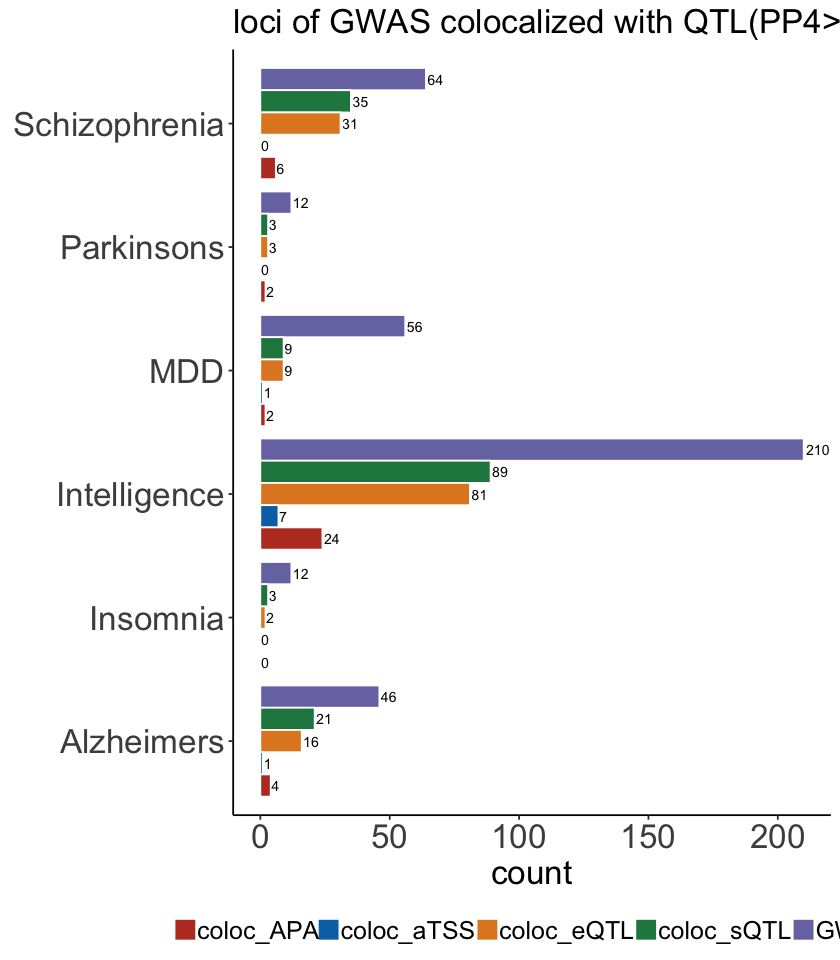

pdf 
  2

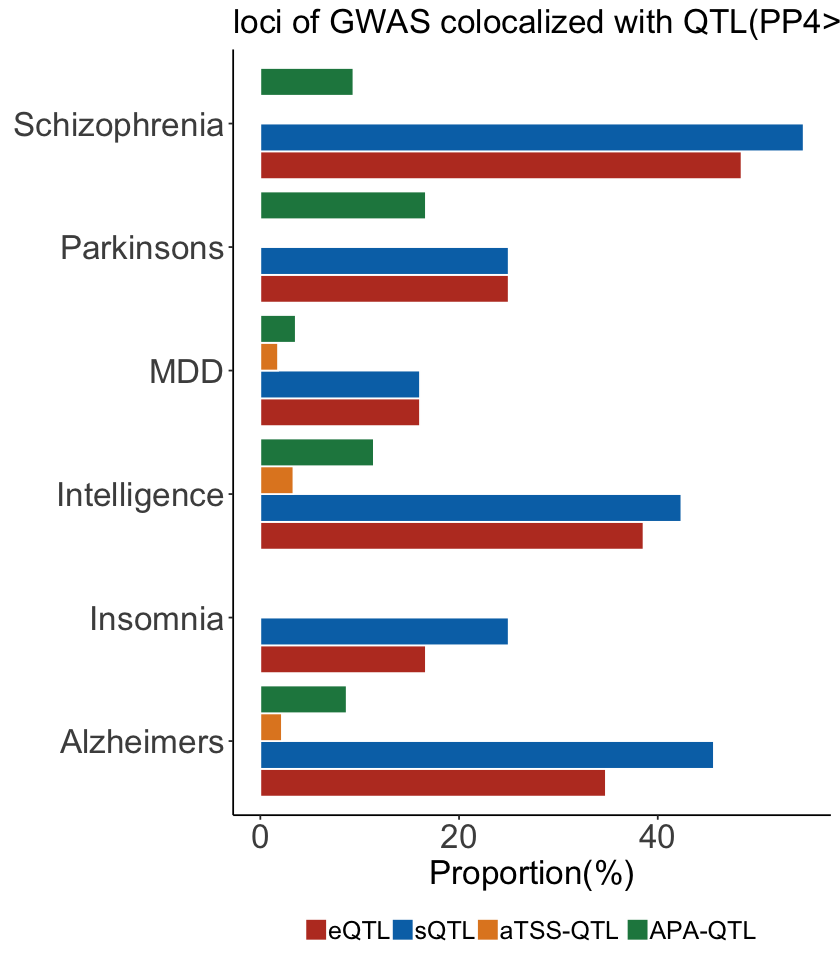

In [14]:
## CNS
options(repr.plot.width=7, repr.plot.height=8)
df %>%
  dplyr::filter(GWAS>10 & !grepl("_SELF_REP",disease)) %>%
  dplyr::mutate(eQTL_pro = 100*coloc_eQTL/GWAS,
                sQTL_pro = 100*coloc_sQTL/GWAS,
                aTSSQTL_pro = 100*coloc_aTSS/GWAS,
                APAQTL_pro = 100*coloc_APA/GWAS
  ) %>%
  tidyr::gather(key = disease, value = count) %>%
  dplyr::mutate(DISEASE = rep(dis_lt,9)) %>%
  dplyr::filter(!grepl("_pro$",disease)) %>%
  dplyr::mutate(QTL = gsub("_pro","",disease),
                QTL = factor(QTL, levels = c("eQTL","sQTL","aTSS-QTL","APA-QTL")),
                group = case_when(
                  DISEASE %in% immune ~ "immune",
                  DISEASE %in% CNS ~ "CNS",
                  DISEASE %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  DISEASE %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                DISEASE = gsub("PASS_","",DISEASE) %>% gsub("UKB_460K.disease_","",.) %>% stringr::str_split(.,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(data=., aes(x=DISEASE, y=count, fill=disease)) +
  geom_bar(stat="identity", color="white", position=position_dodge())+
  theme_classic() + 
  geom_text(aes(label = count), hjust=-0.1, position = position_dodge(width=0.9), size = 3) +
  scale_fill_nejm() +
  ggtitle ("loci of GWAS colocalized with QTL(PP4>0.8)") +
  coord_flip() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =0),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g = df %>%
  dplyr::filter(GWAS>10 & !grepl("_SELF_REP",disease)) %>%
  dplyr::mutate(eQTL_pro = 100*coloc_eQTL/GWAS,
                sQTL_pro = 100*coloc_sQTL/GWAS,
                `aTSS-QTL_pro` = 100*coloc_aTSS/GWAS,
                `APA-QTL_pro` = 100*coloc_APA/GWAS) %>%
  tidyr::gather(key = disease, value = count) %>%
  dplyr::mutate(DISEASE = rep(dis_lt,9)) %>%
  dplyr::filter(grepl("_pro",disease)) %>%
  dplyr::mutate(QTL = gsub("_pro","",disease),
                QTL = factor(QTL, levels = c("eQTL","sQTL","aTSS-QTL","APA-QTL")),
                group = case_when(
                  DISEASE %in% immune ~ "immune",
                  DISEASE %in% CNS ~ "CNS",
                  DISEASE %in% cancer ~ "cancer",
                  # pheno %in% blood ~ "blood",
                  # pheno %in% biochemistry ~ "biochemistry",
                  # pheno %in% body ~ "body",
                  # pheno %in% CVD ~ "CVD",
                  DISEASE %in% metabo ~ "metabo",
                  # pheno %in% behavior ~ "behavior",
                  # pheno %in% repro ~ "repro",
                  # pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                DISEASE = gsub("PASS_","",DISEASE) %>% gsub("UKB_460K.disease_","",.) %>% stringr::str_split(.,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(data=., aes(x=DISEASE, y=count, fill=QTL)) +
  geom_bar(stat="identity", color="white", position=position_dodge())+
  theme_classic() + 
  #geom_text(aes(label = count), hjust=-0.1, position = position_dodge(width=0.9), size = 3) +
  scale_fill_nejm() +
  ggtitle ("loci of GWAS colocalized with QTL(PP4>0.8)") +
  coord_flip() +
  ylab("Proportion(%)") +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =0),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

g
pdf("./Figure7h.pdf", width=7, height=8)
g
dev.off()

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



pdf 
  2

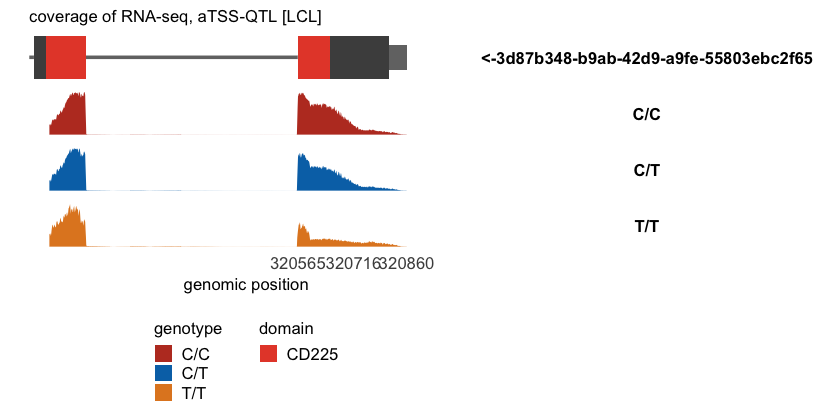

In [15]:
# representative example of aTSS-QTL

options(repr.plot.width=7, repr.plot.height=3.5)
g = g_cov_rep + 
        theme(strip.text.y = element_text(angle = 0)) +
        ylab("") +
        scale_y_continuous(breaks = NULL) +
        guides(color = FALSE) +
        theme_minimal() +
        theme(strip.text.x=element_text(size=10, color="black", face="bold"),
              strip.text.y=element_text(angle = 0, size=10, color="black", face="bold"),
              panel.grid = element_blank(),
              legend.position = "bottom",
              plot.title = element_text(size=10),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size =10),
              axis.text.x = element_text(size = 10),
              axis.text.y = element_text(size = 10),
              legend.text =  element_text(size = 10), 
              legend.key.size = grid::unit(0.8, "lines"),
              legend.title = element_text(size = 10, hjust = 0),
              legend.direction = "vertical", legend.box = "horizontal")
g
pdf("./Figure7i.pdf", width=7, height=3.5)
g
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



pdf 
  2

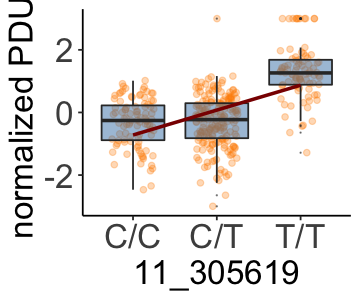

In [16]:
options(repr.plot.width=3, repr.plot.height=2.5)
g = g_qtl_rep +
        theme_classic() +
        theme(strip.text.x=element_text(size=9, color="black", face="bold"),
              strip.text.y=element_text(size=9, color="black", face="bold"),
              legend.position = "bottom",
              plot.title = element_text(size=20),
              axis.title.x = element_text(size=20),
              axis.title.y = element_text(size =20),
              axis.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 20),
              legend.text =  element_text(size = 20), 
              legend.key.size = grid::unit(0.8, "lines"),
              legend.title = element_text(size = 8, hjust = 0))
g
pdf("./Figure7j.pdf", width=3, height=2.5)
g
dev.off()


pdf 
  2

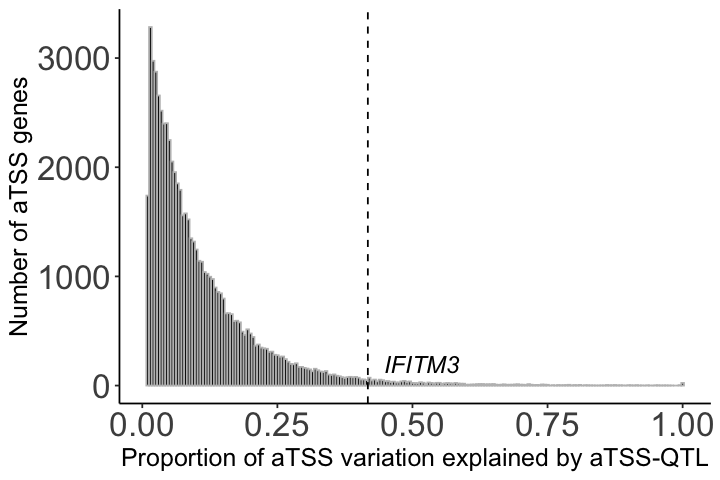

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
pos = her %>%
  dplyr::filter(GeneSymbol == "IFITM3") %>%
  dplyr::filter(cell == "LCL") %>%
  .[1,"hsq"]
g = her %>%
  dplyr::filter(hsq>0.01) %>%
  dplyr::group_by(GeneSymbol) %>%
  dplyr::mutate(tested_cell_count = length(unique(cell))) %>%
  # dplyr::filter(tested_cell_count == 15) %>%
  as.data.frame() %>%
  ggplot(., aes(x = hsq)) + 
  geom_histogram(binwidth = 0.005, fill = "black", color = "grey") +
  geom_vline(xintercept = pos, color = "black", linetype = "dashed") +
  annotate("text", label = "IFITM3", x = pos+0.1, y = 200, color = "black", fontface="italic",size = 5) +
  theme_classic() +
  xlab("Proportion of aTSS variation explained by aTSS-QTL") +
  ylab("Number of aTSS genes") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))
g
pdf("./Figure7j.pdf", width=6, height=4)
g
dev.off()

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



pdf 
  2

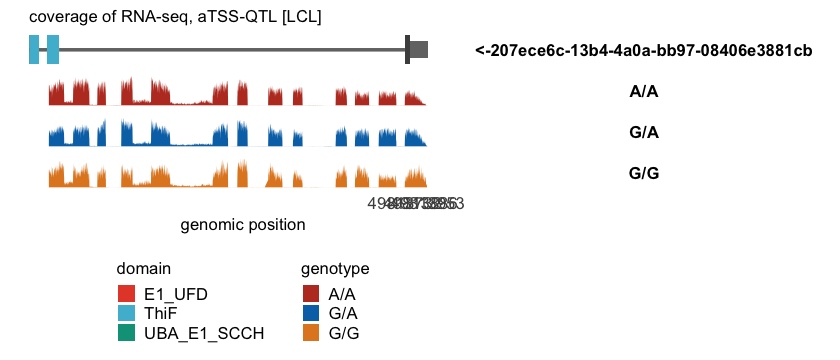

In [18]:
# representative example of aTSS-QTL colocalized with GWAS

options(repr.plot.width=7, repr.plot.height=3)
g = g_cov + 
        theme(strip.text.y = element_text(angle = 0)) +
        ylab("") +
        scale_y_continuous(breaks = NULL) +
        guides(color = FALSE) +
        theme_minimal() +
        theme(strip.text.x=element_text(size=10, color="black", face="bold"),
              strip.text.y=element_text(angle = 0, size=10, color="black", face="bold"),
              panel.grid = element_blank(),
              legend.position = "bottom",
              plot.title = element_text(size=10),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size =10),
              axis.text.x = element_text(size = 10),
              axis.text.y = element_text(size = 10),
              legend.text =  element_text(size = 10), 
              legend.key.size = grid::unit(0.8, "lines"),
              legend.title = element_text(size = 10, hjust = 0),
              legend.direction = "vertical", legend.box = "horizontal")
g
pdf("./Figure7k.pdf", width=7, height=3)
g
dev.off()

In [19]:
gwas_res

chr_pos,other_allele,effect_allele,beta,se,pval,MAF,N
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3_49831022,G,A,0.05545248,0.009128503,2.764569e-09,0.5258,45975


pdf 
  2

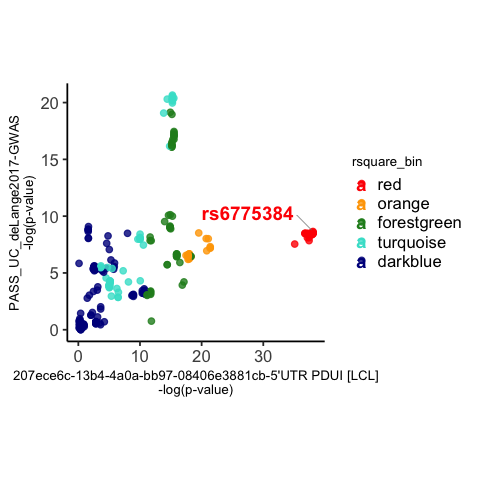

In [20]:
options(repr.plot.width=4, repr.plot.height=4)
g = g_lc +
        theme_classic() +
        theme(strip.text.x=element_text(size=9, color="black", face="bold"),
              strip.text.y=element_text(size=9, color="black", face="bold"),
              legend.position = "right",
              plot.title = element_text(size=8),
              axis.title.x = element_text(size=8),
              axis.title.y = element_text(size =8),
              axis.text.y = element_text(size = 10),
              axis.text.x = element_text(size = 10),
              legend.text =  element_text(size = 10), 
              legend.key.size = grid::unit(0.8, "lines"),
              legend.title = element_text(size = 8, hjust = 0))
g
pdf("./Figure7l.pdf", width=4, height=4)
g
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



pdf 
  2

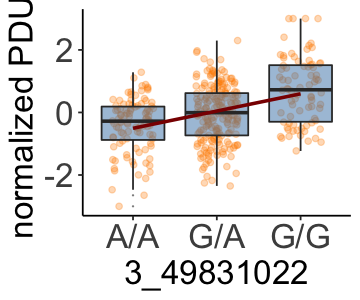

In [21]:
options(repr.plot.width=3, repr.plot.height=2.5)
g = g_qtl +
        theme_classic() +
        theme(strip.text.x=element_text(size=9, color="black", face="bold"),
              strip.text.y=element_text(size=9, color="black", face="bold"),
              legend.position = "bottom",
              plot.title = element_text(size=20),
              axis.title.x = element_text(size=20),
              axis.title.y = element_text(size =20),
              axis.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 20),
              legend.text =  element_text(size = 20), 
              legend.key.size = grid::unit(0.8, "lines"),
              legend.title = element_text(size = 8, hjust = 0))
g
pdf("./Figure7m.pdf", width=3, height=2.5)
g
dev.off()


[1] "extracting RIP-seq peak..."
[1] "plotting..."


pdf 
  2

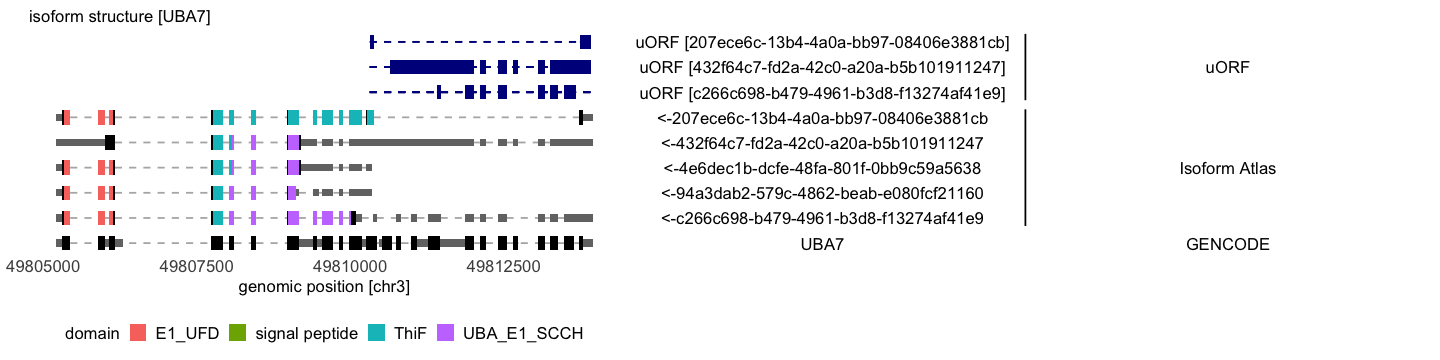

In [22]:
gene="UBA7"

options(repr.plot.width=12, repr.plot.height=3)
g = plot_iso_structure(gene = gene, extra = 1e03, repeat_draw = FALSE, atac_draw = FALSE, rip_draw = FALSE, uorf_draw = TRUE) + theme(strip.text.y=element_text(angle = 0, size=10, color="black"))
g <- ggplotGrob(g)
for(i in which(grepl("strip-r", g$layout$name))){
  g$grobs[[i]]$layout$clip <- "off"
}
grid::grid.draw(g)

pdf("./Figure7n.pdf", width=12, height=3)
grid::grid.draw(g)
dev.off()